<a href="https://colab.research.google.com/github/SepehrModirsanei/LLM_Quran/blob/main/Tafsir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn hazm


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from hazm import word_tokenize, Normalizer
from sklearn.cluster import KMeans
from hazm import Normalizer, word_tokenize
import matplotlib.pyplot as plt  # Adding this import statement
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np



# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# File path of the CSV file
file_path = '/content/drive/My Drive/Persian.csv'

df = pd.read_csv(file_path, header=None, names=['Verse'])

# Initialize empty lists to store Surah No., Ayah No., and Verses
surah_nos = []
ayah_nos = []
verses = []

# Iterate over each row
for index, row in df.iterrows():
    # Split the row by "|"
    parts = row['Verse'].split('|')

    # Extract Surah No., Ayah No., and Verse
    surah_no = int(parts[0])
    ayah_no = int(parts[1])
    verse = parts[2]

    # Append to the respective lists
    surah_nos.append(surah_no)
    ayah_nos.append(ayah_no)
    verses.append(verse)

# Create a new DataFrame with the extracted data
new_df = pd.DataFrame({'Surah No.': surah_nos, 'Ayah No.': ayah_nos, 'Verse': verses})

# Display the new DataFrame
print(new_df)

      Surah No.  Ayah No.                                              Verse
0             1         1                      به نام خداوند بخشنده بخشایشگر
1             1         2   ستایش مخصوص خداوندی است که پروردگار جهانیان است.
2             1         3  (خداوندی که) بخشنده و بخشایشگر است (و رحمت عام...
3             1         4                       (خداوندی که) مالک روز جزاست.
4             1         5  (پروردگارا!) تنها تو را می‌پرستیم؛ و تنها از ت...
...         ...       ...                                                ...
6231        114         2                               به مالک و حاکم مردم،
6232        114         3                             به (خدا و) معبود مردم،
6233        114         4                          از شرّ وسوسه‌گر پنهانکار،
6234        114         5              که در درون سینه انسانها وسوسه می‌کند،
6235        114         6                      خواه از جنّ باشد یا از انسان!

[6236 rows x 3 columns]


In [ ]:

# Input question
question = "لباس زنان "
# Preprocess the input question
normalizer = Normalizer()
preprocessed_question = normalizer.normalize(question)

# Preprocess the verses
normalizer = Normalizer()
new_df['Verse'] = new_df['Verse'].apply(normalizer.normalize)

# Tokenize Persian text
new_df['Verse'] = new_df['Verse'].apply(word_tokenize)

# Tokenize the input question
question_tokens = word_tokenize(preprocessed_question)

# Convert tokens back to Persian text
new_df['Verse'] = new_df['Verse'].apply(lambda x: ' '.join(x))

# Calculate TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(new_df['Verse'])
question_tfidf = vectorizer.transform([preprocessed_question])

# Calculate cosine similarity between the input question and each Ayah
similarities = cosine_similarity(question_tfidf, tfidf_matrix)

# Find the index of the closest Ayah
# closest_ayah_index = similarities.argmax()

# # Get the Ayah details
# closest_ayah_details = new_df.iloc[closest_ayah_index]

# print("Closest Ayah:")
# print("Surah No.:", closest_ayah_details['Surah No.'])
# print("Ayah No.:", closest_ayah_details['Ayah No.'])
# print("Verse:", closest_ayah_details['Verse'])




closest_ayah_indices = np.argsort(similarities, axis=1)[:,-5:]

# Get the Ayah details for each of the 5 closest Ayahs
for i, idx in enumerate(closest_ayah_indices[0]):
    closest_ayah_details = new_df.iloc[idx]
    print(f"Closest Ayah {i+1}:")
    print("Surah No.:", closest_ayah_details['Surah No.'])
    print("Ayah No.:", closest_ayah_details['Ayah No.'])
    print("Verse:", closest_ayah_details['Verse'])
    print()

Closest Ayah 1:
Surah No.: 2
Ayah No.: 187
Verse: آمیزش جنسی با همسرانتان ، در شب روزهایی که روزه می‌گیرید ، حلال است . آنها لباس شما هستند ؛ و شما لباس آنها ( هر دو زینت هم و سبب حفظ یکدیگرید ) . خداوند می‌دانست که شما به خود خیانت می‌کردید ؛ ( و این کار ممنوع را انجام می‌دادید ؛ ) پس توبه شما را پذیرفت و شما را بخشید . اکنون با آنها آمیزش کنید ، و آنچه را خدا برای شما مقرر داشته ، طلب نمایید ! و بخورید و بیاشامید ، تا رشته سپید صبح ، از رشته سیاه ( شب ) برای شما آشکار گردد ! سپس روزه را تا شب ، تکمیل کنید ! و در حالی که در مساجد به اعتکاف پرداخته‌اید ، با زنان آمیزش نکنید ! این ، مرزهای الهی است ؛ پس به آن نزدیک نشوید ! خداوند ، این‌چنین آیات خود را برای مردم ، روشن می‌سازد ، باشد که پرهیزکار گردند !

Closest Ayah 2:
Surah No.: 24
Ayah No.: 26
Verse: زنان ناپاک از آن مردان ناپاکند ، و مردان ناپاک نیز به زنان ناپاک تعلق دارند ؛ و زنان پاک از آن مردان پاک ، و مردان پاک از آن زنان پاکند ! اینان از نسبتهای ناروایی که ( ناپاکان ) به آنان می‌دهند مبرا هستند ؛ و برای آنان آمرزش ( الهی ) و ر

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


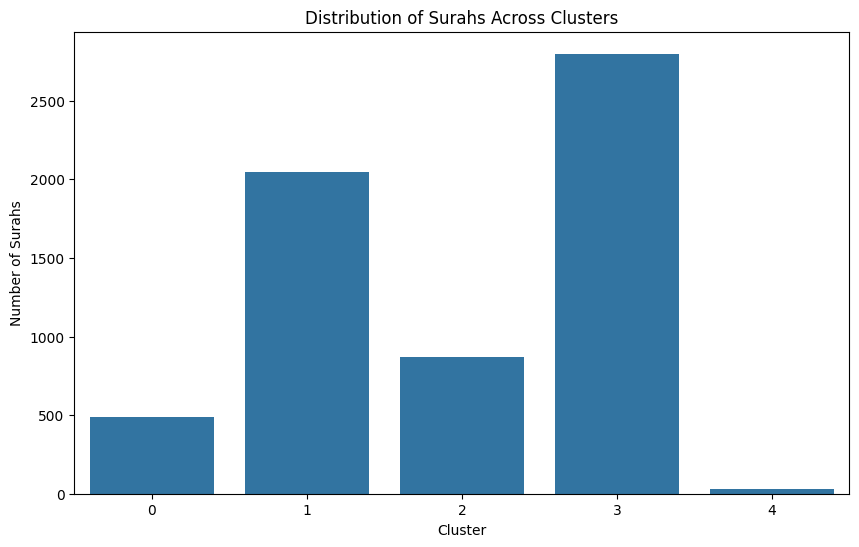

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from hazm import Normalizer, word_tokenize

# File path of the CSV file
# file_path = '/content/drive/My Drive/Persian.csv'

# Read the CSV file into a DataFrame, specifying encoding as 'utf-8'

# Preprocess the verses
normalizer = Normalizer()
new_df['Verse'] = new_df['Verse'].apply(normalizer.normalize)
new_df['Verse'] = new_df['Verse'].apply(word_tokenize)
new_df['Verse'] = new_df['Verse'].apply(lambda x: ' '.join(x))

# Calculate TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(new_df['Verse'])

# Perform K-means clustering
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
new_df['Cluster'] = kmeans.labels_

# Plot bar chart to visualize distribution of surahs across clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='Cluster')
plt.title('Distribution of Surahs Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Surahs')
plt.show()

# Create dendrogram to visualize hierarchical clustering
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')
dendrogram(linkage_matrix, labels=new_df['Surah No.'].tolist(), leaf_rotation=90)
plt.title('Dendrogram of Surahs')
plt.xlabel('Surah')
plt.ylabel('Distance')
plt.show()